Function development

In [93]:
from steinberg_utils import *
from tqdm import tqdm

In [2]:
import numpy as np

In [3]:
import scipy.linalg

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(14,12))
%config InlineBackend.figure_format = 'retina'

Define parameters

In [6]:
omegas=log_eqparamsample_3vertex()

In [7]:
param_choice = param_choice()

In [8]:
np.around(omegas,decimals=3)

array([1.9600e-01, 5.0000e-03, 2.2980e+00, 9.6504e+02, 3.0400e-01,
       3.2140e+00])

In [9]:
param_choice

4

Autocorrelation functions

In [10]:
omegas=log_noneqparamsample_3vertex()

In [11]:
omegas

array([1.05839441e-02, 1.50292284e+01, 3.91407109e-01, 9.39910694e+00,
       1.29377180e+02, 4.87922505e-02])

In [12]:
observable = [3,5,7]
tau_n = np.arange(0.01,2.0,step=0.01)

In [13]:
L = Laplacian_3state(omegas)

In [14]:
t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)

In [15]:
area=steinberg_signature(t,t_rev)

In [16]:
print(np.around(area,decimals=5))

34.79791


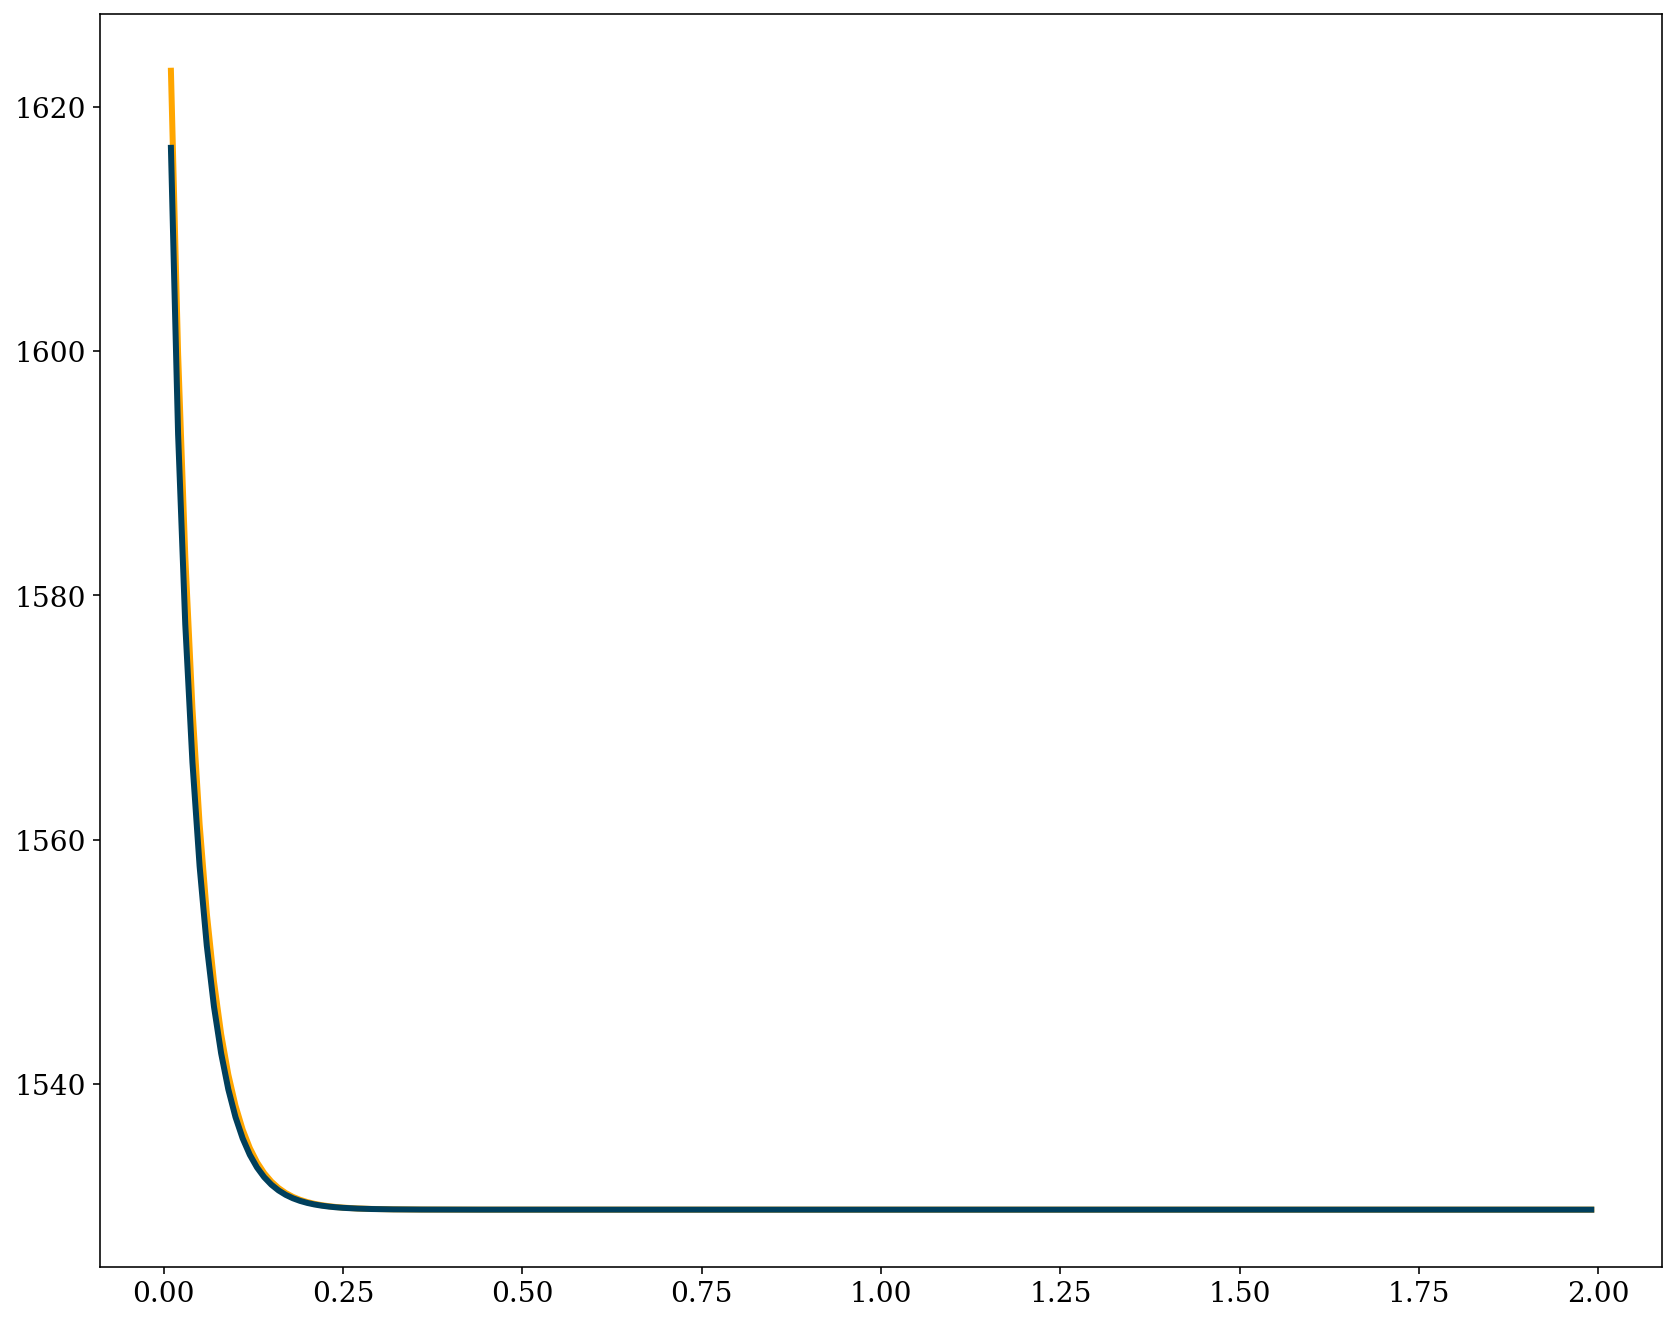

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

#ax.text(0.049, 2000, r'$[a \ b \ d \ c \ f \ e] = $'+ np.array2string(np.around(omegas,decimals=3)),
#        bbox={'facecolor': 'salmon', 'alpha': 1.0, 'pad': 10})

#ax.text(0.07, 2000, r'$A^{\alpha,\beta} = $'+np.array2string(np.around(area,decimals=3)), style='italic',
#        bbox={'facecolor': 'salmon', 'alpha': 1.0, 'pad': 10})

plt.plot(tau_n,t,label=r'$G^{\alpha,\beta}(\tau)$',linewidth=3,color='#ffa600')
plt.plot(tau_n,t_rev,label=r'$G^{\beta,\alpha}(\tau)$',linewidth=3, c= '#003f5c')
plt.show()
fig.savefig('non-eq-example-uvwxyz.png', dpi = 600, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

Force-area curve

In [18]:
num_perturbations = 1000
observable = [3,5,7]
tau_n = np.arange(0.01,10.0,step=0.01)
omegas = log_eqparamsample_3vertex()
omegas[0]

0.001867210829627615

In [19]:
forces, areas = force_area(num_perturbations, omegas, param_choice, observable, tau_n)

  0%|                                          | 1/1000 [00:00<04:41,  3.55it/s]


IndexError: invalid index to scalar variable.

In [ ]:
np.argmax(areas)

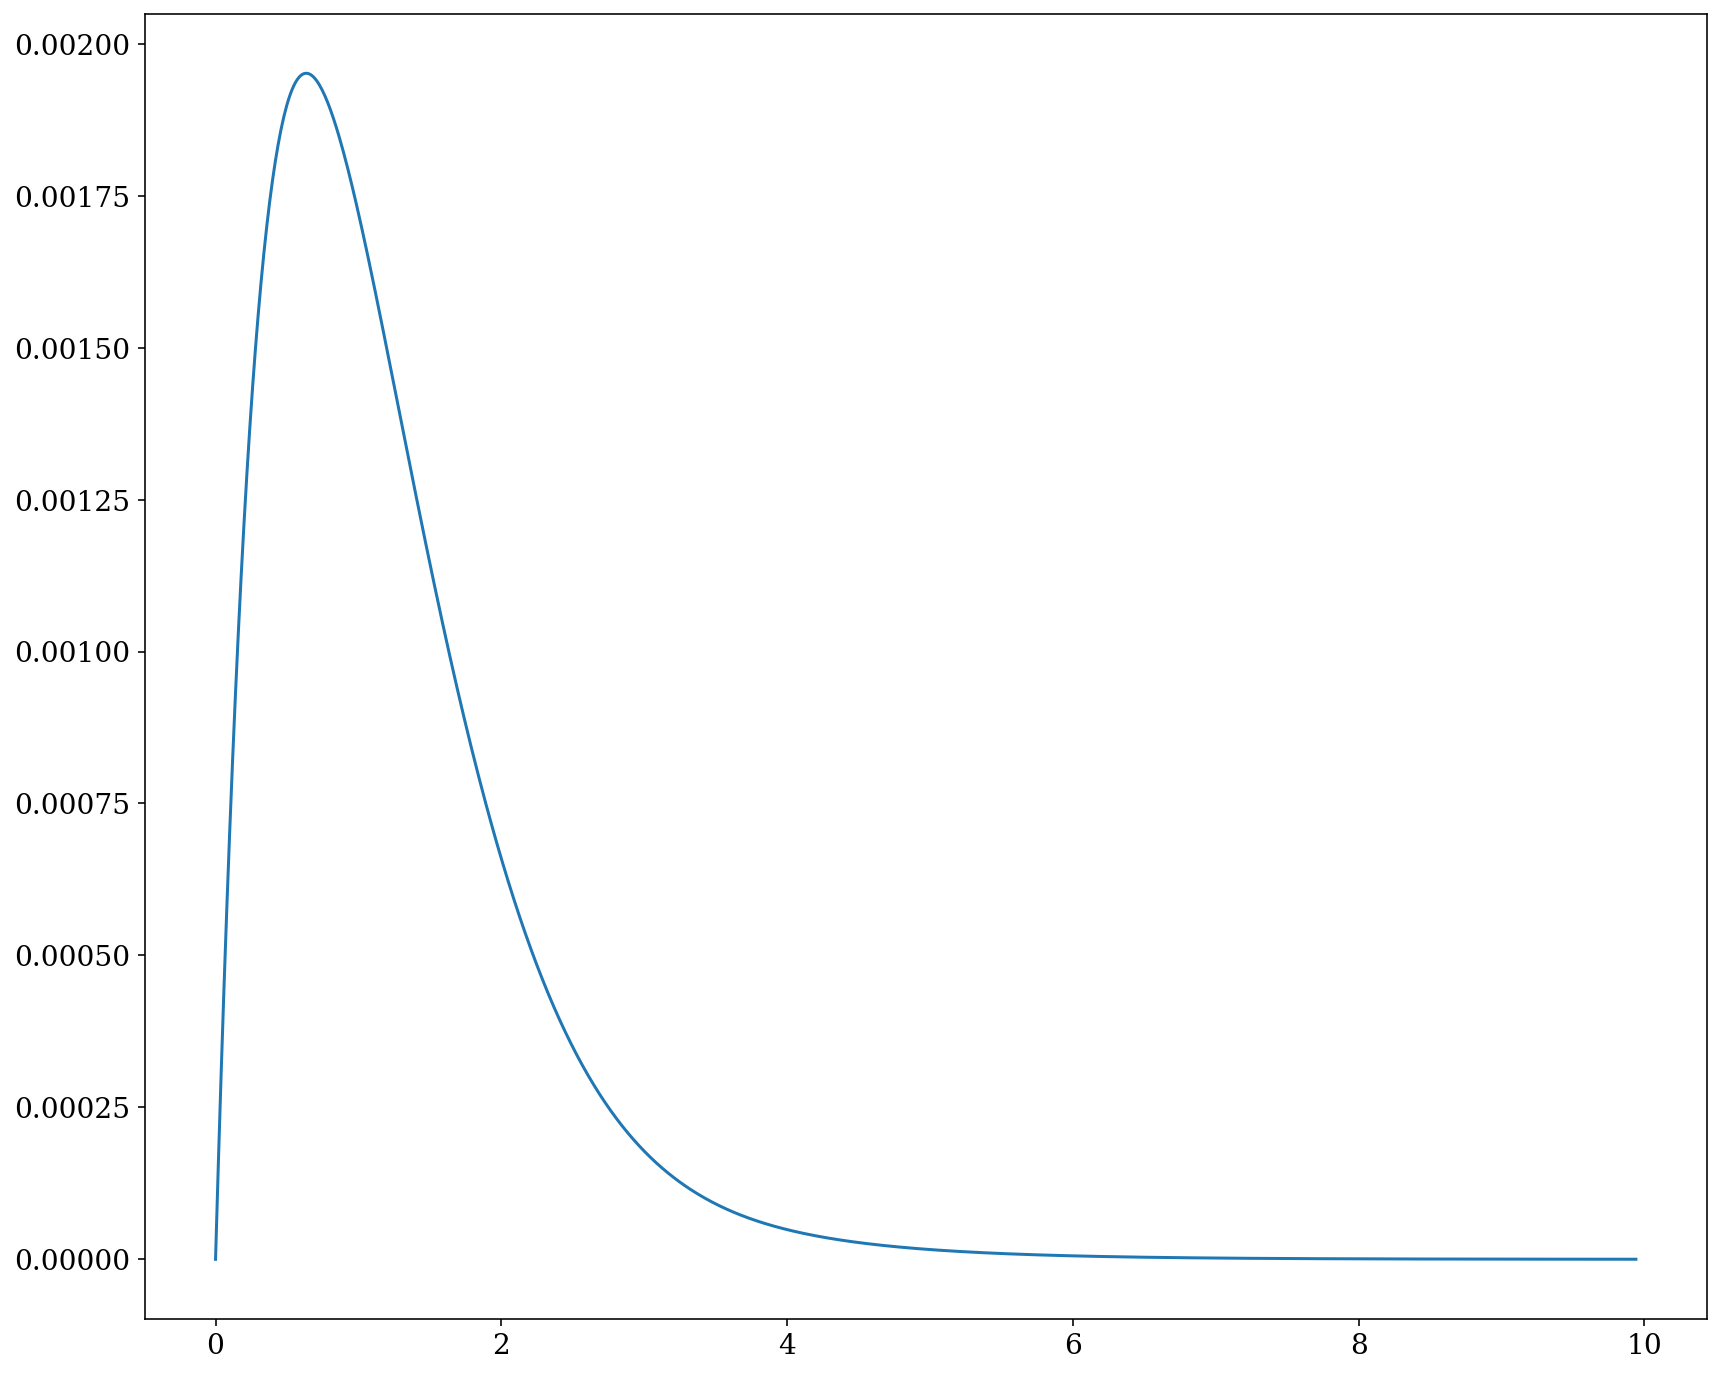

In [191]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

ax.text(0.15, 780, r'$A^{\alpha,\beta} = $'+np.array2string(np.around(area,decimals=3)), style='italic',
        bbox={'facecolor': 'salmon', 'alpha': 1.0, 'pad': 10})

plt.plot(forces,areas)
plt.show()
fig.savefig('force-area-xy.png', dpi = 600, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

Trouble shooting

In [100]:
num_peturbations = 1000
num_params = 6
observable = [3, 5, 7]
tau_n = np.arange(0.01,10.0,step=0.01)
m = 1.01

In [74]:
def log_eqparamsample_3vertex(min_val=-3,max_val=3,num_params=6):
    """
    Logarithmically samples equilibrium parameters for the 3-vertex graph from the range [10^min_val, 10^max_val].
    
    Parameters
    ----------
    min_val : scalar
        minimum value of sampling range (10^min_val)
    max_val : scalar
        maximum value of sampling range (10^min_val)
    num_params: scalar
        number of rate constants in the Markov process (default=6)
        
    Returns
    -------
    omegas : 1D array
             parameter values in 3-state Markov process that satisfy the cycle condition
             order of parameters: 
    """
    omegas = np.zeros(num_params)
    
    # choose the first 5 parameters at random
    omegas[:-1] = 10**(np.random.uniform(min_val,max_val, size = num_params-1))
    
    # allow the 6th parameter (omega_31) to be a free parameter
    omegas[-1] = (omegas[1]*omegas[3]*omegas[4])/(omegas[0]*omegas[2])
                       
    return omegas

In [75]:
omegas = log_eqparamsample_3vertex(min_val=-3,max_val=3,num_params=6)

In [76]:
omegas

array([3.41294597e+01, 2.04222552e-01, 1.85042178e-01, 1.87992972e-01,
       1.81718724e-02, 1.10470125e-04])

In [77]:
def log_noneqparamsample_3vertex(min_val=-3,max_val=3,num_params=6):
    """
    Logarithmically samples non-equilibrium parameters for the 3-vertex graph from the range [10^min_val, 10^max_val].
    
    Parameters
    ----------
    min_val : scalar›
        minimum value of sampling range (10^min_val)
    max_val : scalar
        maximum value of sampling range (10^max_val)
    num_params: scalar
        number of states in the Markov process (default=6)
               
    Returns
    -------
    omegas : 1D array
             non-equilibrium values of parameters in Markovian system
    """
    omegas = np.array([])
    
    while omegas.size == 0:
        
        # choose 6 random integers betweem 0 and 200
        
        # vals.fill(np.random.choice(np.arange(min_val, max_val,step=min_val)))
        vals = 10**(np.random.uniform(min_val,max_val, size = num_params))

        # calculate the forward and reverse cycle products
        forward = vals[0]*vals[2]*vals[5]
        reverse = vals[1]*vals[3]*vals[4]
        
        if (forward != reverse) and (reverse != 0):
            omegas = vals
    
    return omegas

In [78]:
omegas_noneq = log_noneqparamsample_3vertex()

In [79]:
omegas_noneq

array([0.56251435, 0.46585387, 0.07031995, 2.78891154, 0.00347701,
       0.04695178])

In [96]:
param_choice =  np.random.choice(np.arange(num_params-1))
param_choice

2

In [81]:
L = np.array([[-(omegas[0]+omegas[4]), omegas[1], omegas[5]], [omegas[0], -(omegas[1]+omegas[2]), omegas[3]], [omegas[4], omegas[2], -(omegas[5]+omegas[3])]])

In [82]:
def cycle_affinity_3state(omegas):
    """
    Calculates the cycle affinity (or the thermodynamic force) for a single cycle, 3 state Markov process
    
    Parameters
    ----------
    omegas : 1D array
             parameter values of the system
    
    Returns
    -------
    affinity : scalar
               value of the thermodynamic foce of the system
    """
    
    # calculate the forward and reverse cycle products
    forward = omegas[0]*omegas[2]*omegas[5]
    reverse = omegas[1]*omegas[3]*omegas[4]
    
    # calculate the cycle affinity
    affinity = np.log(forward/reverse)
    
    return affinity


In [83]:
affinity = cycle_affinity_3state(omegas)

In [84]:
affinity

0.0

In [85]:
affinity_noneq = cycle_affinity_3state(omegas_noneq)

In [86]:
affinity_noneq

-0.8888573946608811

In [87]:
def NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3):
    """
    Calculates the analytical solution for autocorrelation function given a Laplacian matrix
    
    Parameters
    ----------
    observable : 1D array
        possible values of observable (which is a state function on the Markov process)
    L : 2D array
        column-based Laplacian matrix of system (including diagonal entries)
    tau_n : 1D array
        range of intervals between values of observable taken by system
    alpha : scalar
        exponent
    beta : scalar
        exponent
    
    Returns
    -------
    t : 1D array
        forward autocorrelation function values
    t_rev : 1D array
        reverse autocorrelation function values
    
    """
    f = np.array([observable])
    fstar = f.T
    
    eigvals, eigvecs = np.linalg.eig(L)
    pi = np.array([eigvecs[:,np.argmin(np.abs(eigvals))].real/sum(eigvecs[:,np.argmin(np.abs(eigvals))].real)]).T
    
    # initialize forward and reverse autocorrelation function arrays
    t = np.zeros(len(tau_n))
    t_rev = np.zeros(len(tau_n))
    
    list_result = list(map(lambda i: scipy.linalg.expm(L*i), tau_n))
    
    # populate arrays with analytical solution to autocorrelation function
    for i in range(len(tau_n)):
        t[i] = f**alpha @ list_result[i] @(fstar ** beta * pi)
        t_rev[i] = f**beta @ list_result[i] @(fstar ** alpha * pi)
        
    return t, t_rev

In [88]:
t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n)

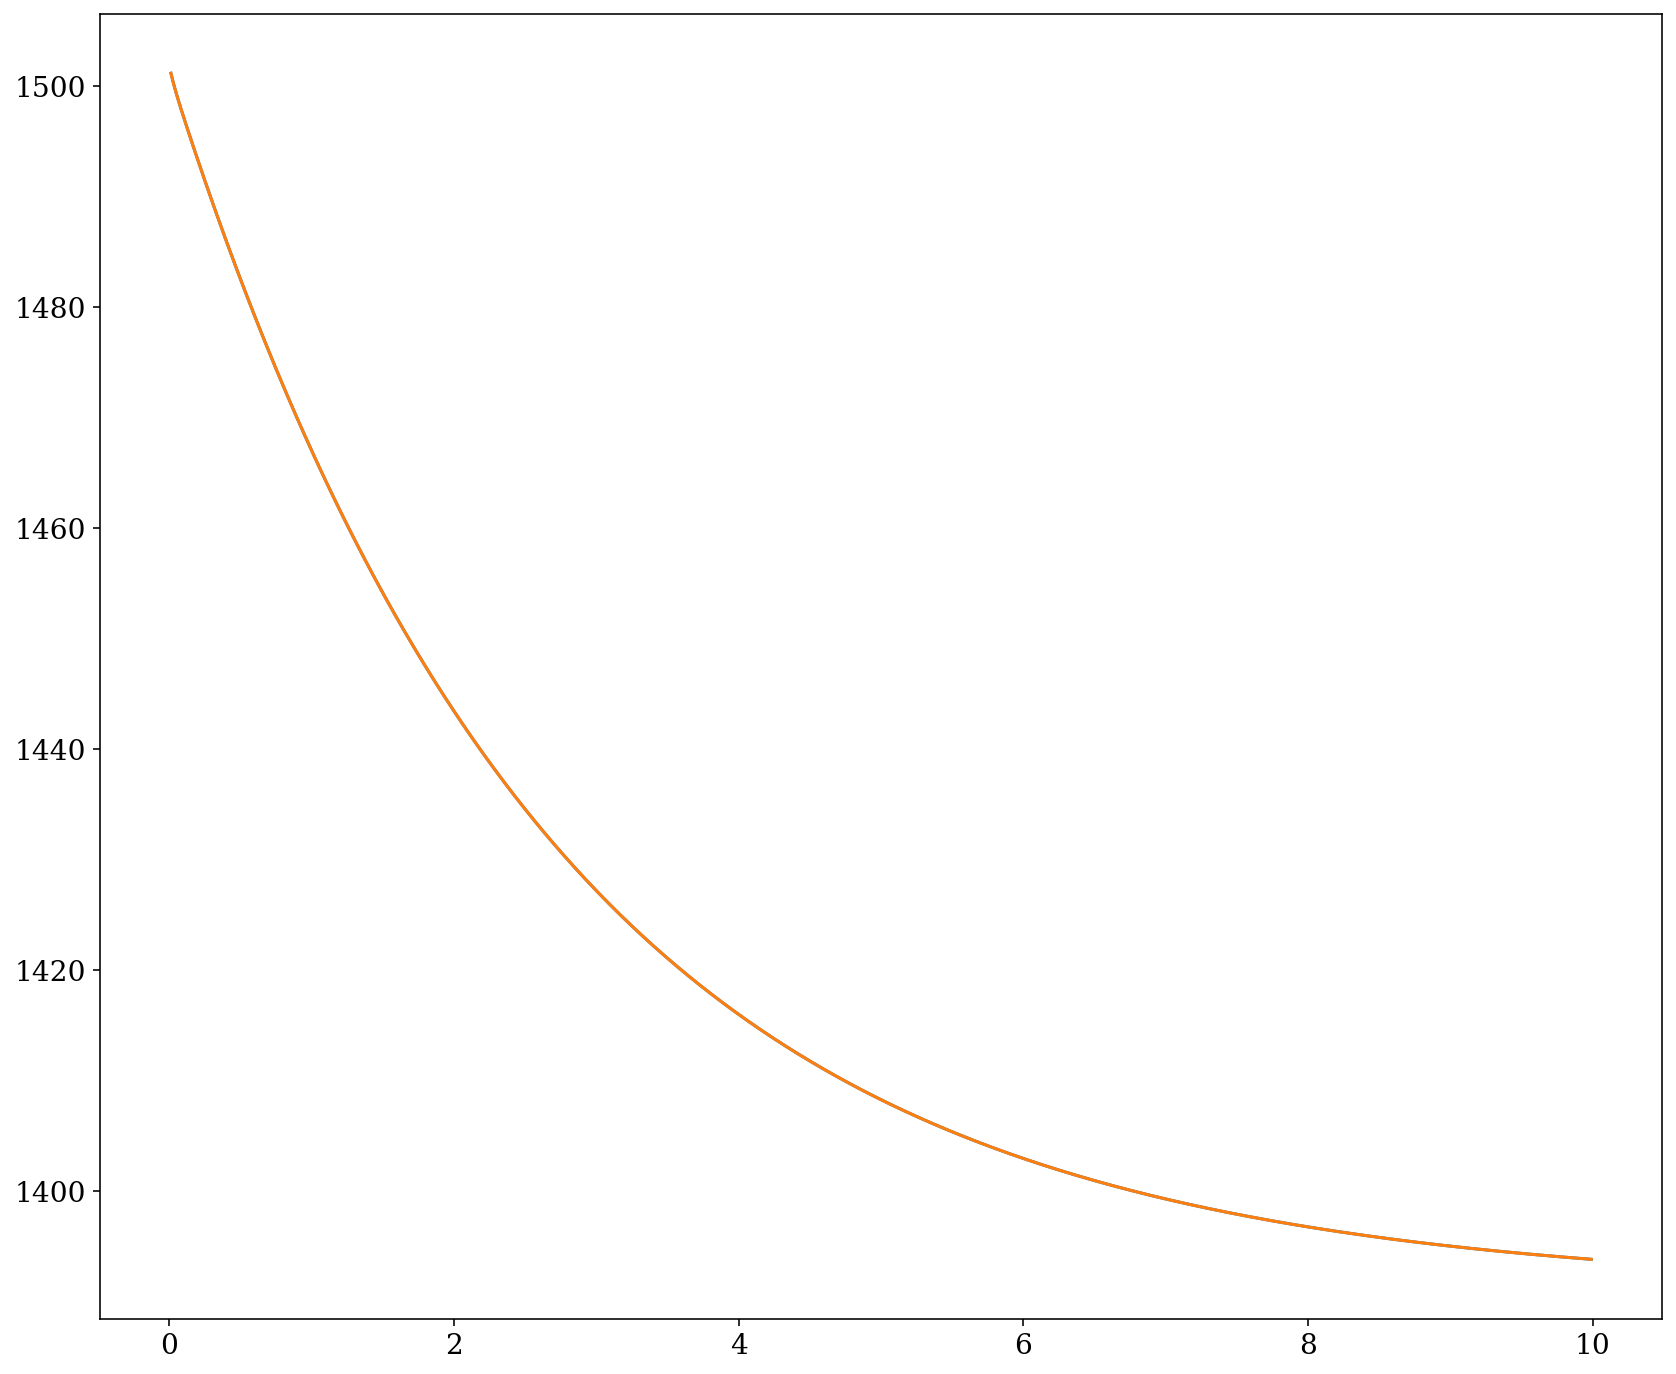

In [89]:
plt.plot(tau_n,t)
plt.plot(tau_n,t_rev)

In [90]:
area = np.abs(np.trapz(t)-np.trapz(t_rev))

In [91]:
area

0.0

In [111]:
print(omegas)

15.868063269428097


In [112]:
omegas = log_eqparamsample_3vertex(min_val=-3,max_val=3,num_params=6)
print(omegas)
print(cycle_affinity_3state(omegas))

[2.85796238e+00 3.02136749e+00 1.48255054e+01 9.43353636e-02
 4.78208388e+02 3.21683847e+00]
0.0


In [114]:
forces = np.zeros(num_perturbations)
areas = np.zeros(num_perturbations)

In [115]:
for i in tqdm(range(0,num_perturbations)):

    # calculate the cycle affinity        
    forces[i] = cycle_affinity_3state(omegas)

    L = np.array([[-(omegas[0]+omegas[4]), omegas[1], omegas[5]], [omegas[0], -(omegas[1]+omegas[2]), omegas[3]], [omegas[4], omegas[2], -(omegas[5]+omegas[3])]])

    t, t_rev = NG_III_autocorrelation_analytical(observable,L,tau_n,alpha=1,beta=3)

    areas[i] = np.abs(np.trapz(t)-np.trapz(t_rev))

    # modify the value of one parameter
    omegas[param_choice] = omegas[param_choice]*m

  3%|█▎                                       | 33/1000 [00:09<04:33,  3.54it/s]


KeyboardInterrupt: 

In [98]:
forces, areas = force_area(num_perturbations, omegas, param_choice, observable, tau_n,m=1.01)

  0%|                                          | 1/1000 [00:00<04:46,  3.49it/s]


IndexError: invalid index to scalar variable.